In [1]:
## to disable onednn 

import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

print(os.environ["TF_ENABLE_ONEDNN_OPTS"])

0


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [3]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()
training_images, testing_images = training_images / 255, testing_images / 255

class_name = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


print(training_images, training_labels)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

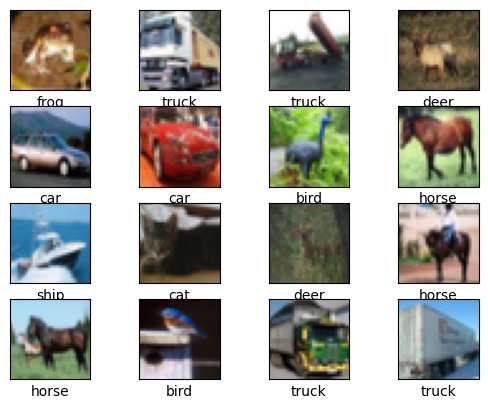

In [4]:
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_name[training_labels[i][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

# loss, accuracy = model.evaluate(testing_images, testing_labels)
# print(f'loss: {loss}')
# print(f'accuracy: {accuracy}')

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.2018 - accuracy: 0.9266 - val_loss: 1.7254 - val_accuracy: 0.6934
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.1798 - accuracy: 0.9348 - val_loss: 1.8417 - val_accuracy: 0.6816
Epoch 3/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.1803 - accuracy: 0.9348 - val_loss: 1.8489 - val_accuracy: 0.6934
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.1658 - accuracy: 0.9396 - val_loss: 1.9975 - val_accuracy: 0.6854
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.1726 - accuracy: 0.9371 - val_loss: 1.9912 - val_accuracy: 0.6845
Epoch 6/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.1653 - accuracy: 0.9401 - val_loss: 2.0274 - val_accuracy: 0.6863
Epoch 7/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.1608 - accuracy: 0.9428 - val_loss: 2.0375 -

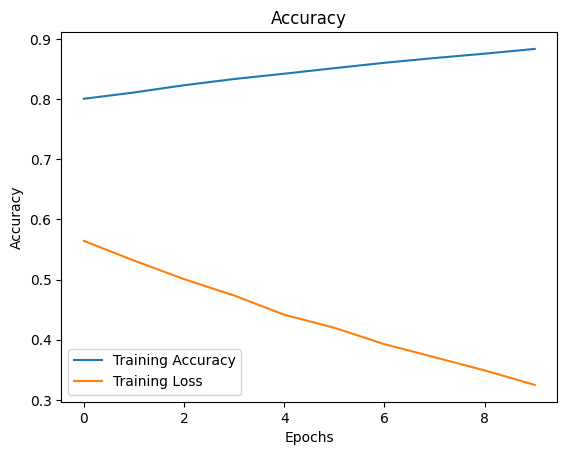

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model.save('image_classification.keras')